In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#load data
titanic= sns.load_dataset('titanic')

titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [3]:
titanic.shape #891 passengers in the dataset

(891, 15)

In [ ]:
#stats #tells there are some missing values in age column, bcz the count is not 891
titanic.describe()


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#count of no. of survivers
#titanic['survived'].sum() 
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


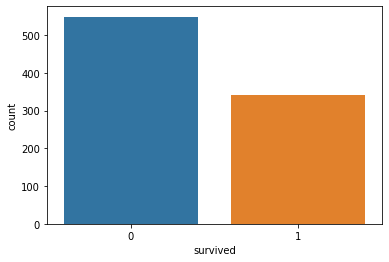

In [ ]:
#visualize count of survivors
sns.countplot(titanic['survived'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

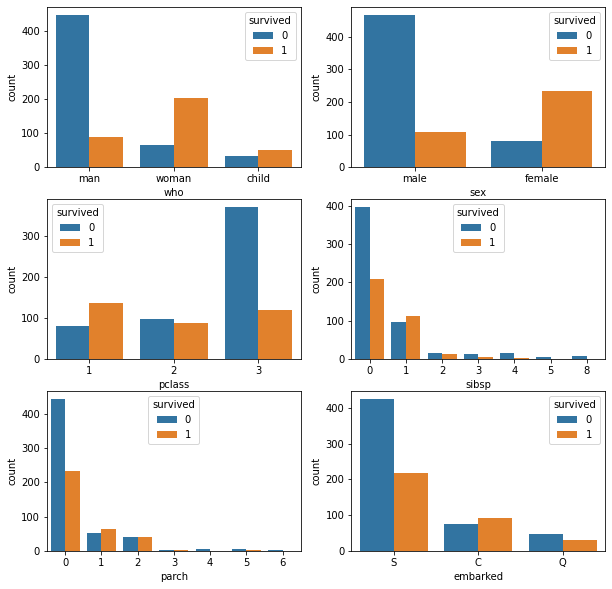

In [ ]:
#other columns count and visualization

cols = [['who', 'sex'], ['pclass', 'sibsp'], ['parch', 'embarked']]

#we want six plots for each feature written in the above list
#so, 2 rows and 3 columns (grid for plotting figures)

 # grid and figure size of each plot
fig, axs = plt.subplots(3,2, figsize=(10,10))

for i in range(0,3):
  for j in range(0,2):
      sns.countplot(titanic[cols[i][j]], hue=titanic['survived'],ax=axs[i][j])  
      


In [ ]:
#survival rate by sex
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [ ]:
#survival rate by sex and class

titanic.pivot_table('survived', index='sex', columns='class')


class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


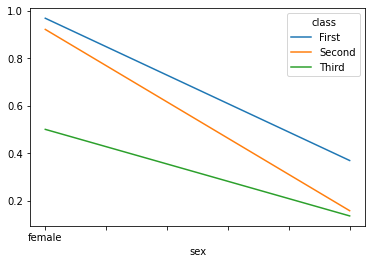

In [ ]:
#visualizing the last act
titanic.pivot_table('survived', 'sex','class').plot() 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


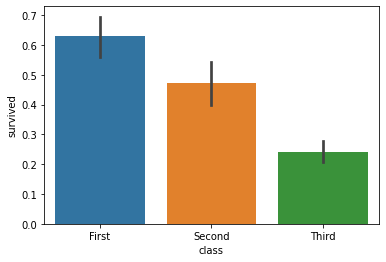

In [ ]:
#plot the survival rate of each class
sns.barplot(titanic['class'], titanic['survived'])

In [ ]:
#plot the survival rate by sex, age and class
age= pd.cut(titanic['age'], [0,18,80])
titanic.pivot_table('survived', ['sex', age], 'class')
#titanic.pivot_table('survived', ['sex',])

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

[]

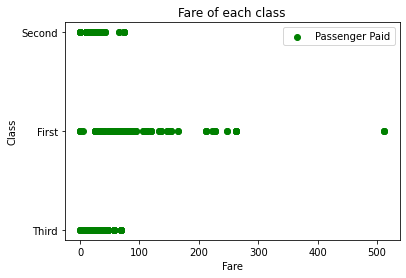

In [ ]:
#plot the prices paid by each class
plt.scatter(titanic['fare'], titanic['class'], color= 'green', label='Passenger Paid')
plt.ylabel('Class')
plt.xlabel('Fare')
plt.title('Fare of each class')
plt.legend()
plt.plot()

In [7]:
#count the empty values in each column
titanic.isna().sum()

#now we ll delete the rows having missing values in any  of the features

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [8]:
#see count of each column
#alive and survived are redundant columns to each other, and similarly there are other columns too that are redundant

for kab in titanic:
  print(titanic[kab].value_counts())

0    549
1    342
Name: survived, dtype: int64
3    491
1    216
2    184
Name: pclass, dtype: int64
male      577
female    314
Name: sex, dtype: int64
24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: age, Length: 88, dtype: int64
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: fare, Length: 248, dtype: int64
S    644
C    168
Q     77
Name: embarked, dtype: int64
Third     491
First     216
Second    184
Name: class, dtype: int64
man      537
woman    271
child     83
Name: who, dtype: int64
True     537
False    354
Name: adult_male, dtype: int64
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: dec

In [9]:
#drop the unnecessary(redundant) columns
titanic=titanic.drop(['deck', 'embark_town', 'alive', 'class', 'who', 'alone', 'adult_male'], axis=1)

#remove the rows with missing values
titanic= titanic.dropna(subset = ['embarked', 'age'])


In [10]:
#count new no. of rows and columns
titanic.shape

(712, 8)

In [11]:
#look at the datatypes
titanic.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

In [12]:
#print unique values in columns
print(titanic['sex'].unique())
print(titanic['embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [13]:
#change data type ofobject to numbers using SKLEARN 
from sklearn.preprocessing import LabelEncoder
labelencoder= LabelEncoder()

#encode sex column
titanic.iloc[:, 2] = labelencoder.fit_transform(titanic.iloc[:, 2].values)

#encode embarked column
titanic.iloc[:, 7] = labelencoder.fit_transform(titanic.iloc[:, 7].values)

In [14]:
#print unique values in columns
print(titanic['sex'].unique())
print(titanic['embarked'].unique())

[1 0]
[2 0 1]


In [19]:
titanic.dtypes

survived      int64
pclass        int64
sex           int64
age         float64
sibsp         int64
parch         int64
fare        float64
embarked      int64
dtype: object

In [15]:
#split the data into independant 'x' and dependent 'y' variables
X= titanic.iloc[:, 1:8].values  #leaving the first column 'survived' and rest taking all columns
Y=titanic.iloc[:, 0].values  #putting 'survived' column into Y

In [16]:
#train-test split into 80%training and 20% testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [17]:
#feature scaling

from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test )

In [18]:
#creat a function with many machine learning models
def models(X_train, Y_train):

     #use logistic regression
     from sklearn.linear_model import LogisticRegression
     log=LogisticRegression(random_state=0)
     log.fit(X_train, Y_train)

     #Use KNeighbours
     from sklearn.neighbors import KNeighborsClassifier
     knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
     knn.fit(X_train, Y_train)

     #Use SVC(Linear Kernel)
     from sklearn.svm import SVC
     svc_lin = SVC(kernel= 'linear', random_state= 0)
     svc_lin.fit(X_train, Y_train)

     #Use SVC Model( Kernel RBF)
     from sklearn.svm import SVC
     svc_rbf = SVC(kernel= 'rbf', random_state= 0)
     svc_rbf.fit(X_train, Y_train)

     #Use GaussianNB
     from sklearn.naive_bayes import GaussianNB
     gauss =  GaussianNB()
     gauss.fit(X_train, Y_train)

     #Use Decision Tree
     from sklearn.tree import DecisionTreeClassifier
     tree =  DecisionTreeClassifier(criterion= 'entropy', random_state=0)
     tree.fit(X_train, Y_train)

     #Use Random Forest Classifier
     from sklearn.ensemble import RandomForestClassifier
     Forest= RandomForestClassifier(n_estimators= 10, criterion='entropy', random_state=0)
     Forest.fit(X_train, Y_train)

     #Print the training accuracy for each model
     print('[0]Logistic Regressiom Training Accuracy', log.score(X_train, Y_train))
     print('[1]K Neighbors  Training Accuracy', knn.score(X_train, Y_train))
     print('[2]Support Vector Classifier (Linear) Training Accuracy', svc_lin.score(X_train, Y_train))
     print('[3]Support Vector Classifier (RBF) Training Accuracy', svc_rbf.score(X_train, Y_train))
     print('[4]Gaussian NB Training Accuracy', gauss.score(X_train, Y_train))
     print('[5]Decision Tree Training Accuracy', tree.score(X_train, Y_train))
     print('[6]Random Forest Training Accuracy', Forest.score(X_train, Y_train))
     
     

     return log, knn, svc_lin, svc_rbf, gauss, tree, Forest
    

In [19]:
#Get and train all models
model= models(X_train, Y_train)

[0]Logistic Regressiom Training Accuracy 0.7978910369068541
[1]K Neighbors  Training Accuracy 0.8664323374340949
[2]Support Vector Classifier (Linear) Training Accuracy 0.7768014059753954
[3]Support Vector Classifier (RBF) Training Accuracy 0.8506151142355008
[4]Gaussian NB Training Accuracy 0.8031634446397188
[5]Decision Tree Training Accuracy 0.9929701230228472
[6]Random Forest Training Accuracy 0.9753954305799648


In [27]:
print(model[6])

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)


In [23]:
#Show the confusion matrix and accuracy of all models on test data
from sklearn.metrics import confusion_matrix

for i in range(len(model)):
  cm= confusion_matrix(Y_test,model[i].predict(X_test))

  #Extract TN, FP, FN, TP
  TN, FP, FN, TP = confusion_matrix(Y_test, model[i].predict(X_test)).ravel()
  test_score = (TP+TN)/(TP+ TN+ FN+ FP)

  print(cm)
  print('Model[{}] Testing Accuracy = "{}"'.format(i, test_score ))
  print()


[[75  7]
 [19 42]]
Model[0] Testing Accuracy = "0.8181818181818182"

[[67 15]
 [20 41]]
Model[1] Testing Accuracy = "0.7552447552447552"

[[70 12]
 [18 43]]
Model[2] Testing Accuracy = "0.7902097902097902"

[[75  7]
 [22 39]]
Model[3] Testing Accuracy = "0.7972027972027972"

[[69 13]
 [27 34]]
Model[4] Testing Accuracy = "0.7202797202797203"

[[54 28]
 [12 49]]
Model[5] Testing Accuracy = "0.7202797202797203"

[[73  9]
 [14 47]]
Model[6] Testing Accuracy = "0.8391608391608392"



In [29]:
#Get feature importance
forest = model[6]
importances =  pd.DataFrame({'feature': titanic.iloc[:, 1:8].columns, 'importance': np.round(forest.feature_importances_, 3)} )
importances = importances.sort_values('importance', ascending=False).set_index('feature')
importances

pandas.core.frame.DataFrame

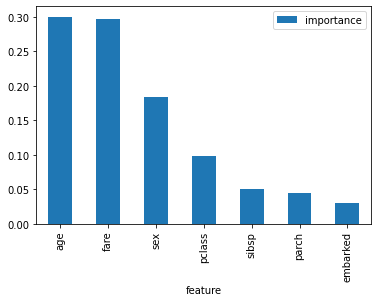

In [30]:
#Visualize Importances
importances.plot.bar()


In [32]:
#print the prediction of the random Forest Classifier
pred= model[6].predict(X_test)
print(pred)

print()

#actual values print
print(Y_test)

[1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1
 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1]

[0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1]


In [37]:
#predicting my survival
my_survival = [[3,1,23, 0, 0, 0, 1]]

#scaling the survival
from sklearn.preprocessing import StandardScaler
scc = StandardScaler()
my_survival_scaled = scc.fit_transform(my_survival)

#print prediction of my survival using random forest classofierir
pred= model[6].predict(my_survival_scaled)
print(pred)

if pred == 0:
  print('You would have died in the titanic')
else:
  print('You would have survived, Congrats!') 

[0]
You would have died in the titanic
